In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("mpg.csv")

In [3]:
data = data[data.horsepower != "?"]

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [5]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
from sklearn.model_selection import train_test_split
df=data
training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
target = 'mpg'

X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.10, random_state=169)

In [14]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=22)

#n_estimators here mean weak learners that will be clubbed into one strong model

In [15]:
model.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=22)

In [16]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 2.91
R Square score: 0.94


In [17]:
#to see the weights of the weak learners(models)
model.estimator_weights_

array([1.97102629, 0.95956644, 1.50896357, 1.04100679, 1.1287572 ,
       1.09219067, 0.43520003, 1.18432366, 0.40089895, 1.00900689,
       0.56087169, 0.91563363, 0.980316  , 0.97821663, 0.80787179,
       0.8921105 , 0.80720435, 0.90429693, 0.48472451, 0.88023993,
       0.87004486, 0.61337047])

[Text(167.4, 190.26, 'X[2] <= 189.5\nmse = 60.835\nsamples = 352\nvalue = 23.376'),
 Text(83.7, 135.9, 'X[3] <= 78.5\nmse = 34.541\nsamples = 203\nvalue = 28.507'),
 Text(41.85, 81.53999999999999, 'X[4] <= 84.0\nmse = 21.703\nsamples = 133\nvalue = 26.133'),
 Text(20.925, 27.180000000000007, 'mse = 13.934\nsamples = 74\nvalue = 28.884'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 10.055\nsamples = 59\nvalue = 22.683'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 128.5\nmse = 27.885\nsamples = 70\nvalue = 33.017'),
 Text(104.625, 27.180000000000007, 'mse = 20.013\nsamples = 49\nvalue = 35.22'),
 Text(146.475, 27.180000000000007, 'mse = 8.497\nsamples = 21\nvalue = 27.876'),
 Text(251.10000000000002, 135.9, 'X[4] <= 142.5\nmse = 11.939\nsamples = 149\nvalue = 16.387'),
 Text(209.25, 81.53999999999999, 'X[2] <= 241.0\nmse = 6.255\nsamples = 84\nvalue = 18.652'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 3.675\nsamples = 42\nvalue = 19.76'),
 Text(230.175, 27

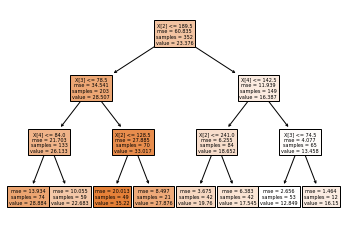

In [18]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0],filled=True)

#reduce depth to get a clear picture with values
# model.estimators_[i] here i can be 0 to 21 since number of estimators are 22